In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/data/netflix_titles.csv'

#pandas read_csv로 불러오기
df = pd.read_csv(filename)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

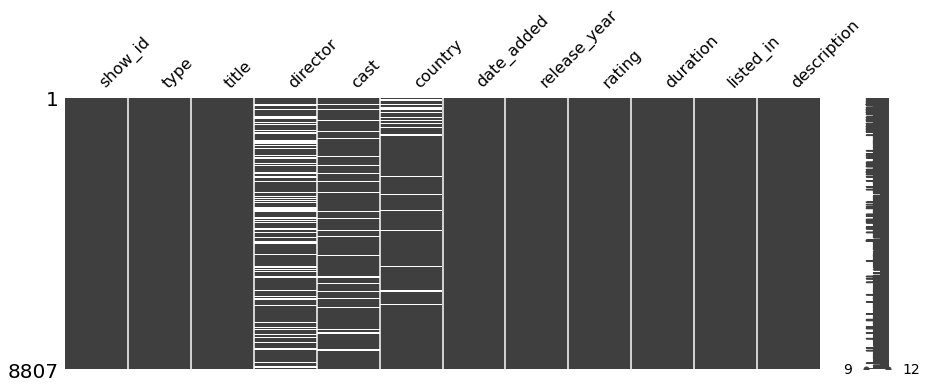

In [ ]:
missingno.matrix(df, figsize = (15,5))

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# 비어있는 Rating값 처리

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
# 비어있는 duration 처리

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# 컬럼제거 : director, cast

In [ ]:
df = df.drop(['director','cast'], axis=1)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# 비어있는 date_added 처리

In [ ]:
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
df = df[df['date_added'].notna()]

In [ ]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# 비어있는 country 처리

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
# 새로운 컬럼 생성

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 연도별, 월별 컬럼 생성

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8797, dtype: object

In [ ]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8797, dtype: object

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [ ]:
# new country 값 생성

In [ ]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

In [ ]:
# date type 설정

In [ ]:
df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [ ]:
# type - category
df['type'] = pd.Categorical(df['type'])
# target_ages - category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added - integer
df['year_added'] = pd.to_numeric(df['year_added'])

In [ ]:
# 데이터 시각화

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults,South Africa
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults,United States
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults,United States
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults,India


In [ ]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

show_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults,South Africa
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults,United States
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults,United States
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults,India
5,s6,TV Show,Midnight Mass,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September,Adults,United States


In [ ]:
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# movie > tv show

In [ ]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [ ]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

In [ ]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.2, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.81, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [ ]:
# 어른들을 위한 컨텐츠가 많다

In [ ]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
# 컨텐츠 공개 시각화

In [ ]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
# tv show를 더 릴리즈 하는쪽으로 가고 있다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



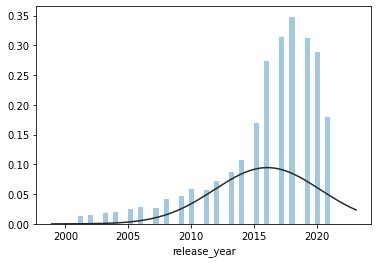

In [ ]:
from scipy.stats import norm

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

In [ ]:
# 해가 갈수록 릴리즈 되는 컨텐츠들이 많아지고 있다

In [ ]:
# 데이터 분석 및 시각화

In [ ]:
# 장르 분석

In [ ]:
movie_df['genre'] = movie_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
show_df['genre'] = show_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

display(movie_df['genre'].head())
display(show_df['genre'].head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: genre, dtype: object

1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
5                 [TV Dramas, TV Horror, TV Mysteries]
Name: genre, dtype: object

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [ ]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [ ]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [ ]:
top_genres(movie_df, title='Top Movies Genres')

In [ ]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [ ]:
top_genres(show_df, title='Top TV Shows Genres')

In [ ]:
# 코릴레이션

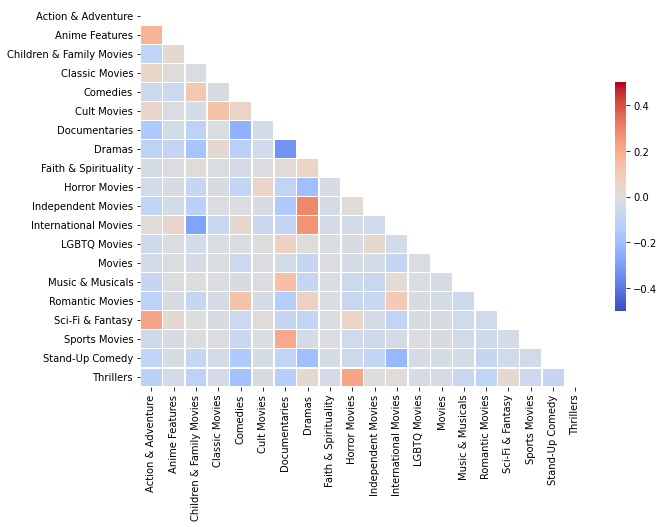

In [ ]:
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

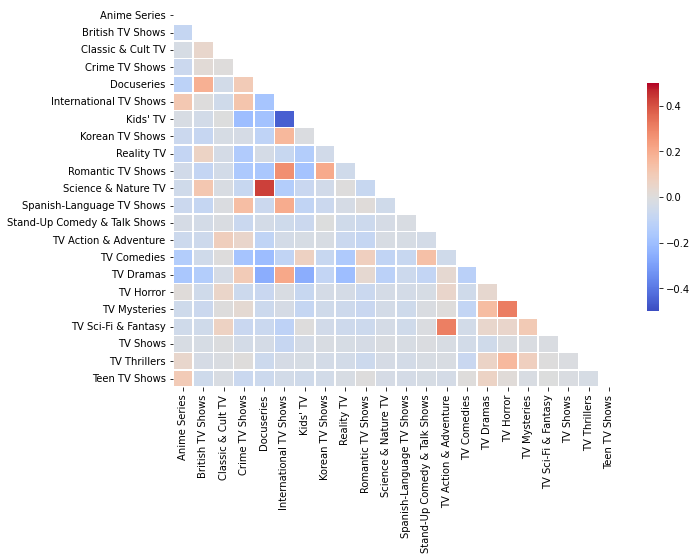

In [ ]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

In [ ]:
# duration 분석

In [ ]:
# 시리즈 분석

In [ ]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

In [ ]:
# 영화 분석

In [ ]:
temp_duration = movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
movie_df.loc[temp_duration.loc[temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 90) & (temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hours'
movie_df.loc[temp_duration.loc[temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

In [ ]:
movie_df.head()

In [ ]:
def check_genre_contains(genres):
    for genre in genres:
        if genre in top_movies_genres:
            return True
    return False

In [ ]:
movie_df['principal_genre'] = movie_df['genre'].apply(lambda genres: genres[0])
movie_df['principal_genre'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                Documentaries
6     Children & Family Movies
7                       Dramas
9                     Comedies
12                      Dramas
Name: principal_genre, dtype: object

In [ ]:
year_genre_df = movie_df[(movie_df['principal_genre'].isin(top_movies_genres)) & (movie_df['year_added'] >= 2017)].groupby(['principal_genre', 'year_added']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'year_added', 'count']

fig = px.sunburst(year_genre_df, path=['year_added', 'principal_genre'], values='count', color='year_added')
fig.show()

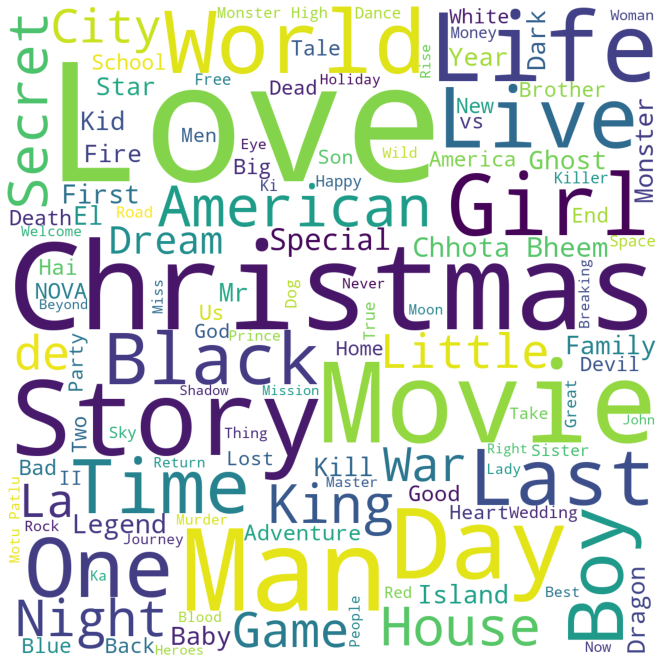

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(movie_df['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

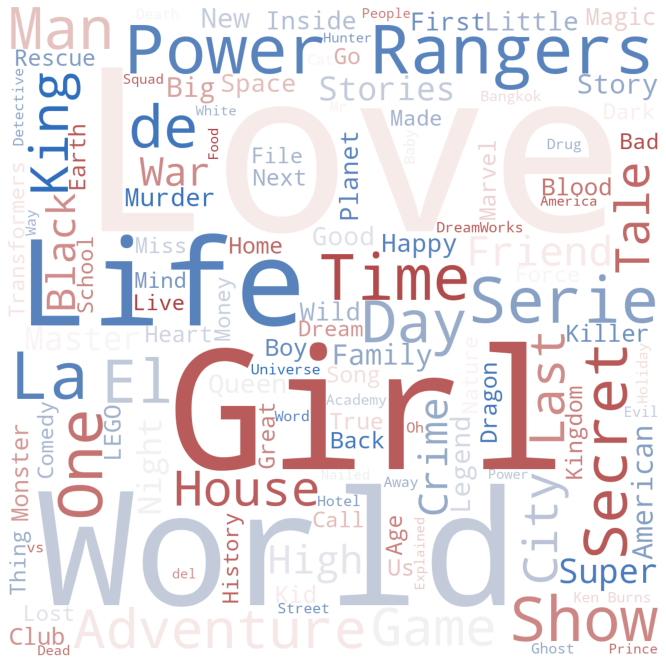

In [ ]:
text = ' '.join(show_df['title']) 

plt.rcParams['figure.figsize'] = (12,12) 
wordcloud = WordCloud(background_color = 'white',colormap='vlag', width = 1200, height = 1200, max_words = 121).generate(text) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
